In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

In [19]:
sizes = np.arange(10, 210, 10)
reps = 10000

In [20]:
def sim_r_squared(n):
    x = np.random.randn(n).reshape(-1, 1)
    y = 1 + x.reshape(-1) + np.random.randn(n)
    model = LinearRegression().fit(x, y)
    return model.score(x, y)

In [21]:
r_squared_q95 = []
r_squared_q5 = []
r_squared_mean = []

In [22]:
start_time = time.time()

In [23]:
for i in range(len(sizes)):
    result = []
    for j in range(reps):
        result.append(sim_r_squared(sizes[i]))
    r_squared_mean.append(np.mean(result))
    r_squared_q95.append(np.quantile(result,0.95))
    r_squared_q5.append(np.quantile(result,0.05))
exec_time = time.time() - start_time

Execution time: 103.74155783653259


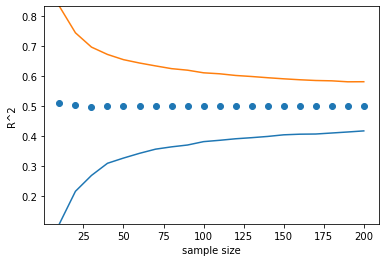

In [24]:
print("Execution time: " + str(exec_time))
plt.scatter(sizes, r_squared_mean)
plt.plot(sizes, r_squared_q5)
plt.plot(sizes, r_squared_q95)
plt.ylim(min(r_squared_q5), max(r_squared_q95))
plt.xlabel("sample size")
plt.ylabel("R^2")
plt.show()